In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
stock_data = pd.read_csv("stocks-us-adjClose.csv")
columns = stock_data.columns
print(columns[0])
print("Stock data read successfully!")

compiled from Yahoo! Finance data by Matt Borthwick
Stock data read successfully!


In [49]:
stock_data.describe(include ='all')

,date,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU,AverageStockValue
count,12032,12032.000000,12031.000000,12032.000000,12032.000000,12032.000000,12032.000000,11420.000000,11420.000000,11420.000000,...,460.000000,450.000000,454.000000,435.000000,431.000000,404.000000,369.000000,370.000000,111.000000,12032.000000
unique,12032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1989-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1970-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.221365,4.657988,25.838805,13.652820,22.134786,16.284163,9.438188,5.889809,21.605734,...,12.600630,32.214744,17.034681,23.999344,24.114049,21.716609,25.844302,27.022637,26.099459,15.171299
std,NaN,19.088316,16.842472,32.410597,15.029301,28.448792,12.776508,11.311896,5.349967,21.981663,...,3.755889,7.738454,6.913292,1.114315,2.694388,7.130715,0.705820,8.601911,2.053580,14.168217
min,NaN,0.092676,0.000419,0.443472,0.505457,1.075315,1.371796,0.399763,0.166962,0.567899,...,8.240000,20.765186,6.200000,21.602850,20.027443,12.460000,23.400555,15.100000,23.010000,0.631077
25%,NaN,0.980461,0.000945,2.323380,2.445677,2.826035,3.909828,0.962391,0.665296,1.363244,...,10.030000,23.462122,9.992500,22.829292,22.619232,16.555000,25.341570,18.657500,24.220000,2.327281


In [48]:
stock_data.head()

,date,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU,AverageStockValue
0,1970-01-02,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.005409
1,1970-01-05,0.320831,0.000481,0.585290,1.839623,1.470783,1.873423,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015072
2,1970-01-06,0.316553,0.000477,0.576929,1.845694,1.435234,1.855694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.005097
3,1970-01-07,0.312275,0.000475,0.575535,1.809266,1.390800,1.814324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.983779
4,1970-01-08,0.312275,0.000469,0.586683,1.821408,1.395244,1.832054,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991356


## Questions about the data:

1. What has been the average trend of all the companies over the years/decades?
2. What has been trend of newer companies post 1990?
3. What has been percentage increase per year for some random companies?
4. Find companies with correlated data. 
5. Find company which correlates the best with average increase in data. 
6. Find when companies were started? Find time period when most companies were formed/went public. 
7. Find statistics for 20 day window. 
8. Arrange companies based on best year to year increase in value. 

In [45]:
#print(stock_data.dtypes)
stock_data['AverageStockValue'] = stock_data.mean(axis =1, skipna =True)

In [46]:
stock_data = stock_data.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "date"})

### Average stock value over the years.

/usr/local/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


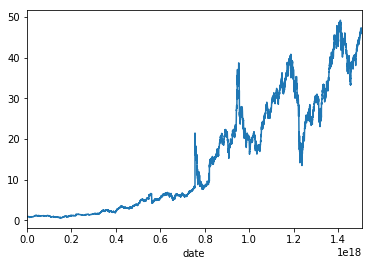

In [47]:
stock_data['date'] = pd.to_datetime(stock_data['date'], format = "%Y-%m-%d")
sns.tsplot(time =stock_data["date"], data = stock_data["AverageStockValue"])

/usr/local/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


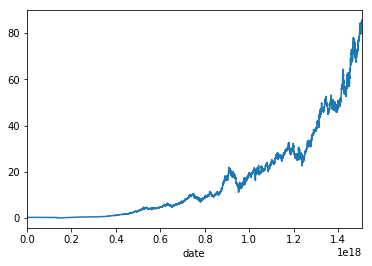

In [50]:
sns.tsplot( time =stock_data["date"], data = stock_data["ED"])

In [51]:
stock_data.columns.values

array(['date', 'ED', 'DD', 'CVX', 'FL', 'CAT', 'IP', 'SJW', 'F', 'LLY',
       'AVP', 'NFG', 'BF-A', 'MATX', 'BK', 'SNE', 'KR', 'BP', 'C', 'CL',
       'APA', 'DDS', 'TSN', 'OII', 'BIF', 'LAWS', 'GWW', 'JCP', 'VNO',
       'LPX', 'WABC', 'NWLI', 'GLT', 'LUB', 'NL', 'PGR', 'BF-B', 'ADI',
       'GHC', 'GFI', 'SJI', 'SHLM', 'BAC', 'CTS', 'MAT', 'AP', 'WGO',
       'MYL', 'TRC', 'GIS', 'TMO', 'VLGEA', 'DUK', 'JPM', 'AGYS', 'L',
       'BDX', 'D', 'TGNA', 'IR', 'CAL', 'MSEX', 'NJR', 'ANAT', 'KMT',
       'SENEB', 'WMK', 'AEM', 'KMB', 'CHD', 'DHR', 'AVA', 'FUL', 'BBT',
       'FHN', 'INTC', 'KSU', 'CTG', 'KYO', 'MUX', 'MOG-A', 'CSX', 'CECE',
       'SEIC', 'PHIIK', 'NVO', 'COP', 'IFF', 'SLB', 'HUM', 'OXY', 'VLO',
       'HRS', 'SO', 'THC', 'IHC', 'VBF', 'CVBF', 'RDC', 'FMBI', 'TRST',
       'ASNA', 'LM', 'PAYX', 'SLM', 'AXE', 'SGMS', 'CB', 'JCI', 'SWK',
       'NVR', 'ROST', 'JKHY', 'CBU', 'STKL', 'MSFT', 'HVT-A', 'CY', 'BDN',
       'VIVO', 'FISV', 'UNM', 'TWN', 'EQC', 'MMT', 'CMU', 'FUN',

### Find the relationship between the value of the stock over the year, and the percentage change over a 100 day period for any company from the data.

In [143]:
HSBC = stock_data['HSBC'].dropna()

HSBC = HSBC.pct_change(periods =100)

4568
4568


/usr/local/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


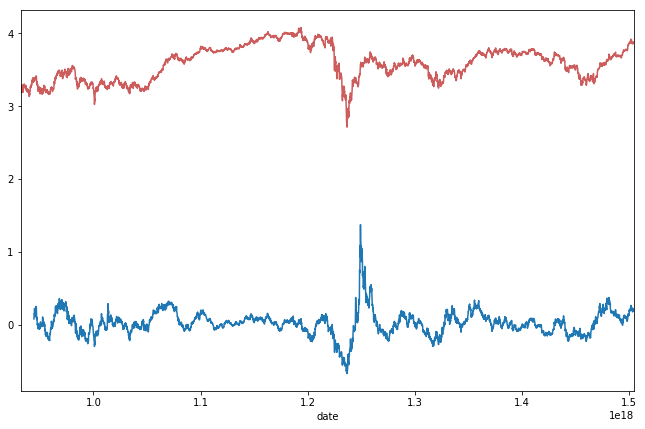

In [144]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(11,7))
rem  = len(stock_data["date"])-(len(HSBC))
print(len(stock_data["date"].iloc[rem:]))
print(len(stock_data['HSBC'].dropna()))
g = sns.tsplot( time =stock_data["date"].iloc[rem:], data = HSBC)
g = sns.tsplot( time =stock_data["date"].iloc[rem:], data = np.log(stock_data['HSBC'].dropna()), color = 'indianred')
#ax.set_xlim(0.9, )
#g.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(0.9))
#g.set(xlim=(0.9,))

### Find which decade most of the companies were started? 

In [223]:
#year =  pd.Series([i.year for i in stock_data['date']])
year=list()
init_val = list()
col = list()
len_data = len(stock_data['date'])
#print(len_data)
for column in stock_data:
    year.append(stock_data['date'][len_data-len(stock_data[column].dropna())])
    init_val.append(stock_data[column][len_data-len(stock_data[column].dropna())])
    #pr
    int(len(stock_data[column].dropna()))
    col.append(column)
year =  pd.Series([i.year for i in year])

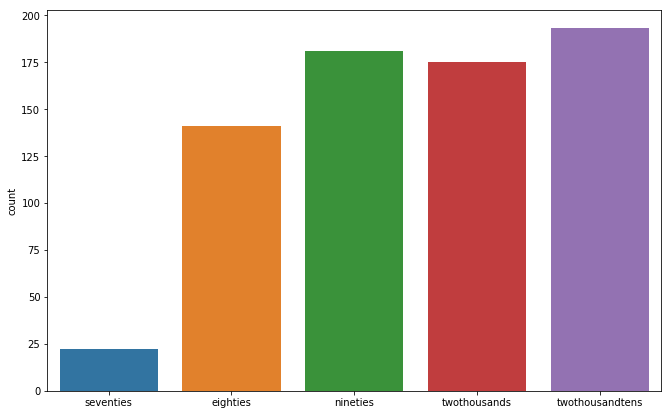

In [224]:
bins = [1969, 1979, 1989, 1999, 2009, 2019]
labels =['seventies', 'eighties', 'nineties', 'twothousands', 'twothousandtens']
year_bins = pd.cut(year, bins, labels=labels)
fig, ax = plt.subplots(figsize=(11,7))
sns.countplot(x=year_bins)

### Find the value of stock for each company started in the year given be x axis. 

711
<class 'int'>


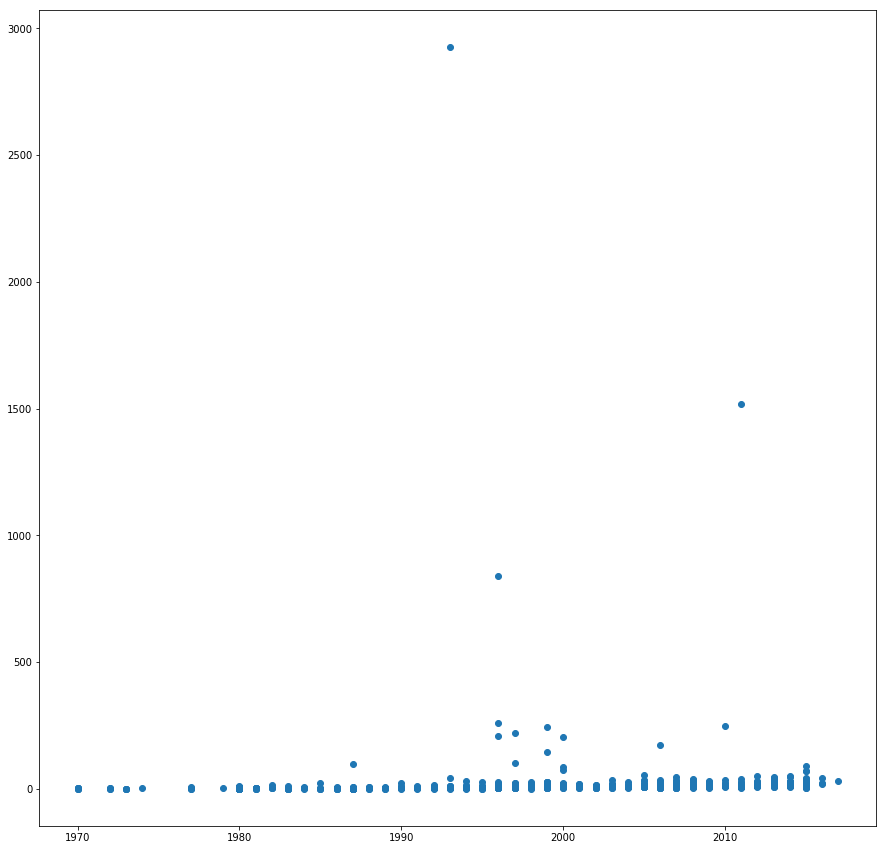

In [233]:
print(len(year[1:]))
print(type(year[0]))
year = [int(i) for i in year]
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(year[1:],init_val[1:])